In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
user_input_path = input("[REQUIRED] Please Enter data file path: ")
dataset_extension = user_input_path.split('.')[-1]

if dataset_extension in ['xlsx', 'xls', 'xlt']:
    df = pd.read_excel(user_input_path)
elif dataset_extension == 'csv':
    df = pd.read_csv(user_input_path)
elif dataset_extension == 'tsv':
    df = pd.read_csv(user_input_path, sep='\t')
else:
    print(f'UnRechognized file extinsion {dataset_extension} try again with supported file.')
    print('Supported extensions is: .xlsx, .xls, .xlt, .csv, .tsv')
    

[REQUIRED] Please Enter data file path: fatal-police-shootings-data.csv


In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False
5415,5927,TK TK,2020-06-16,shot,gun,27.0,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
id                         5416 non-null int64
name                       5416 non-null object
date                       5416 non-null object
manner_of_death            5416 non-null object
armed                      5189 non-null object
age                        5181 non-null float64
gender                     5414 non-null object
race                       4895 non-null object
city                       5416 non-null object
state                      5416 non-null object
signs_of_mental_illness    5416 non-null bool
threat_level               5416 non-null object
flee                       5167 non-null object
body_camera                5416 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 518.5+ KB


In [6]:
df.shape

(5416, 14)

In [7]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [8]:
df.count()

id                         5416
name                       5416
date                       5416
manner_of_death            5416
armed                      5189
age                        5181
gender                     5414
race                       4895
city                       5416
state                      5416
signs_of_mental_illness    5416
threat_level               5416
flee                       5167
body_camera                5416
dtype: int64

In [9]:
df.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [10]:
df.nunique(axis=0)

id                         5416
name                       5206
date                       1844
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2470
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

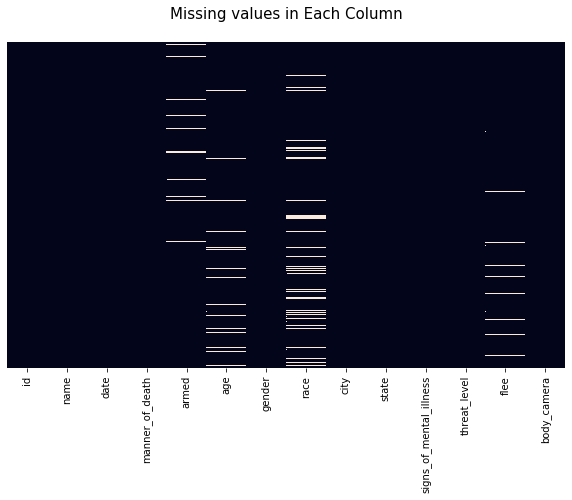

In [13]:
plt.figure(figsize = (10,6))
plt.title("Missing values in Each Column\n", size = 15)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

In [14]:
df.replace(np.nan,'0',inplace = True)

In [15]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

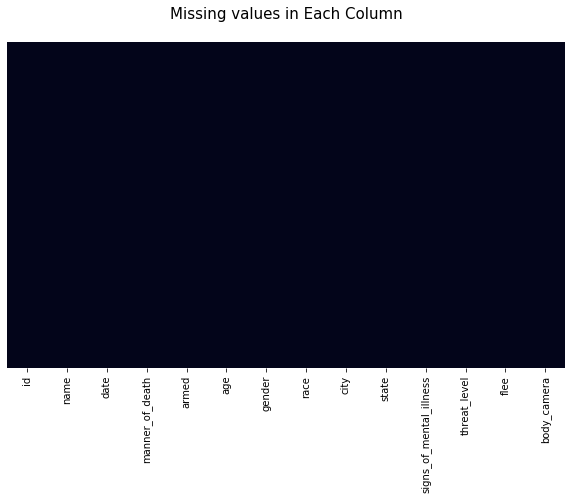

In [16]:
plt.figure(figsize = (10,6))
plt.title("Missing values in Each Column\n", size = 15)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

In [17]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,id,signs_of_mental_illness,body_camera
manner_of_death,,,
shot,3034.653129,0.219588,0.111932
shot and Tasered,2548.118519,0.318519,0.155556


,id,signs_of_mental_illness,body_camera
gender,,,
0,4330.500000,0.500000,0.00000
F,2994.462185,0.302521,0.10084
M,3010.620943,0.220827,0.11476


,id,signs_of_mental_illness,body_camera
race,,,
0,4027.447217,0.216891,0.076775
A,3162.225806,0.258065,0.172043
B,2944.973035,0.141757,0.157165
H,2909.364745,0.174058,0.117517
N,2922.756410,0.179487,0.153846
O,2566.437500,0.229167,0.125000
W,2873.159935,0.287964,0.094507


,id,signs_of_mental_illness,body_camera
threat_level,,,
attack,3013.317597,0.214592,0.108727
other,3017.207491,0.255648,0.127824
undetermined,2919.786611,0.150628,0.096234


,id,signs_of_mental_illness,body_camera
flee,,,
0,4026.847390,0.128514,0.096386
Car,3138.361111,0.097778,0.085556
Foot,3104.750000,0.111272,0.144509
Not fleeing,2890.467312,0.293755,0.116095
Other,2861.195122,0.103659,0.128049


In [18]:
df.corr()

,id,signs_of_mental_illness,body_camera
id,1.000000,-0.084858,0.019280
signs_of_mental_illness,-0.084858,1.000000,0.051838
body_camera,0.019280,0.051838,1.000000


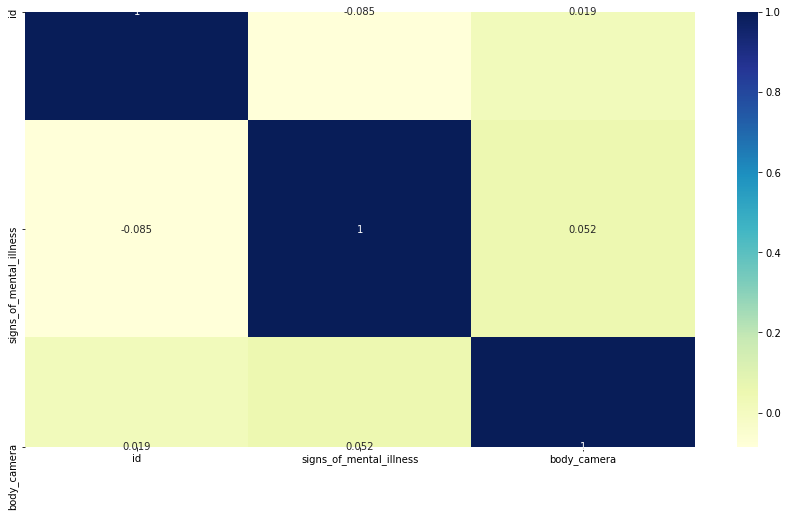

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [20]:
import pandas_profiling as pp 

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
pp.ProfileReport(df)

Number of variables,14
Number of observations,5416
Total Missing (%),0.0%
Total size in memory,518.5 KiB
Average record size in memory,98.0 B
Numeric,1
Categorical,10
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [23]:
df.describe(include='object')

,name,date,manner_of_death,armed,age,gender,race,city,state,threat_level,flee
count,5416,5416,5416,5416,5416,5416,5416,5416,5416,5416,5416
unique,5206,1844,2,94,78,3,7,2470,51,3,5
top,TK TK,2018-04-01,shot,gun,0,M,W,Los Angeles,CA,attack,Not fleeing
freq,187,9,5146,3060,235,5176,2476,85,799,3495,3411


['manner_of_death', 'gender', 'race', 'threat_level', 'flee']


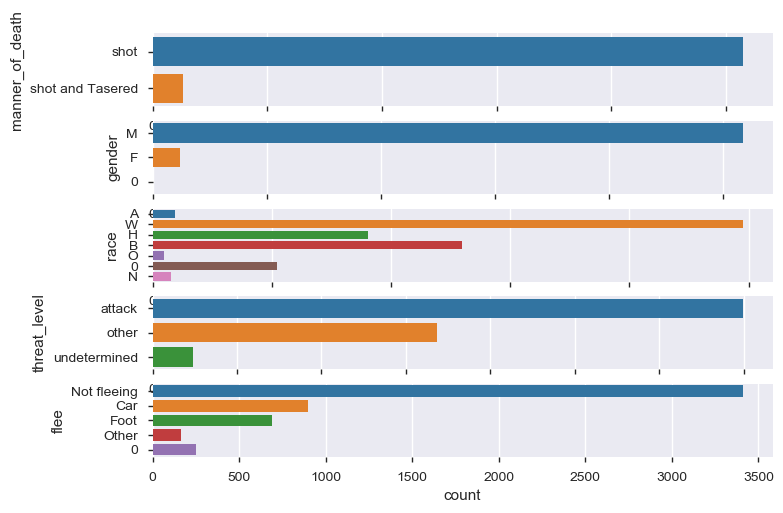

In [24]:
categorical = []
for column in df.select_dtypes(include='object'):
    if df[column].nunique() <= 10:
        categorical.append(column)

print(categorical)
fig,axs=plt.subplots(len(categorical),1,)

for i, column in enumerate(categorical):
    sns.countplot(y=column, data=df,ax=axs[i])

plt.show()

In [25]:
df.describe(exclude='object')

,id,signs_of_mental_illness,body_camera
count,5416.000000,5416,5416
unique,NaN,2,2
top,NaN,False,False
freq,NaN,4200,4798
mean,3010.398264,NaN,NaN
std,1695.786456,NaN,NaN
min,3.000000,NaN,NaN
25%,1545.750000,NaN,NaN
50%,3009.500000,NaN,NaN
75%,4486.250000,NaN,NaN


['signs_of_mental_illness', 'body_camera']


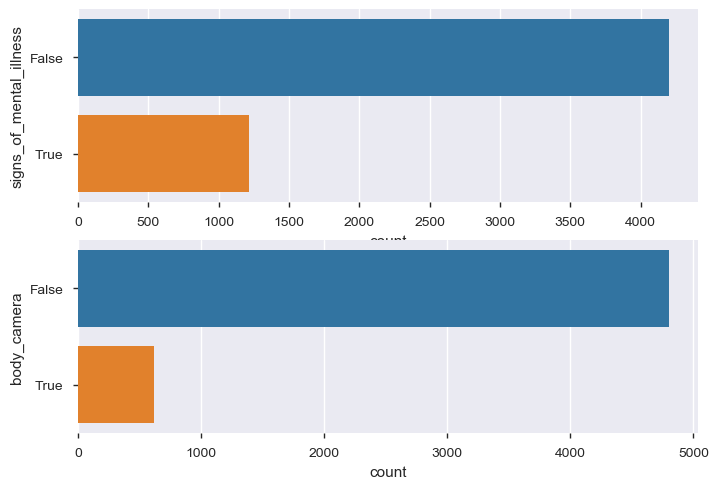

In [26]:
boolean = []
for column in df.select_dtypes(exclude='object'):
    if df[column].nunique() <= 10:
        boolean.append(column)

print(boolean)
fig,axs=plt.subplots(len(boolean),1,)

for i, column in enumerate(boolean):
    sns.countplot(y=column, data=df,ax=axs[i])

plt.show()

['id', 'signs_of_mental_illness', 'body_camera']


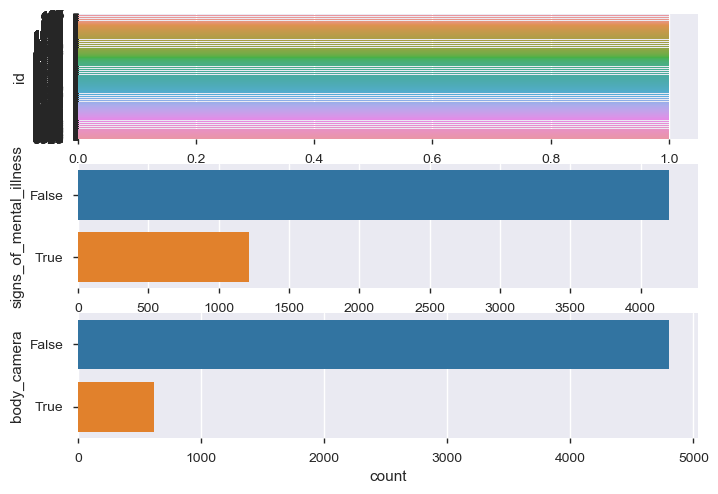

In [27]:
non_cat = []
for column in df.select_dtypes(exclude='object'):
    if df[column].nunique() > 1:
        non_cat.append(column)

print(non_cat)
fig,axs=plt.subplots(len(non_cat),1,)

for i, column in enumerate(non_cat):
    sns.countplot(y=column, data=df,ax=axs[i])

plt.show()